In [1]:
!pip install torch
!pip install torchvision

In [2]:
import torch
import torchvision
from torchvision import transforms
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm, datasets
from sklearn.svm import SVC,NuSVC,SVR
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV,cross_validate,train_test_split
import matplotlib.pyplot as plt

In [6]:
transformer = transforms.Compose([
                               torchvision.transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.flatten(x)),
                             ])

In [7]:
train_set=torchvision.datasets.FashionMNIST('./files/fashion-mnist/', train=True, download=True,
                             transform=transformer)

test_set=torchvision.datasets.FashionMNIST('./files/fashion-mnist/', train=False, download=True,
                             transform=transformer)

batch_size_train= len(train_set)//5
batch_size_test=len(test_set)

In [8]:
train_loader = torch.utils.data.DataLoader(
  train_set,
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  test_set,
  batch_size=batch_size_test, shuffle=True)

In [9]:
train_enumerated = enumerate(train_loader)
batch_idx, (train_x, train_y) = next(train_enumerated)

test_enumerated = enumerate(test_loader)
batch_idx, (test_x, test_y) = next(test_enumerated)

In [10]:
train_x.shape

torch.Size([12000, 784])

In [8]:
train_x[1].shape

torch.Size([784])

# SVM Introduction

Support Vector Machines \(SVM\) са набор от контролирани методи за обучение, използвани за класификация,
регресия и откриване на отклонения.

Предимствата на SVM са:

- Ефективен в многомерни пространства.

- Ефективен в случаите, когато броят на характеристиките \(features\) е по-голям от броя на наборните данни.

- Използва подмножество от тренировъчни точки във функцията за вземане на решения (наречени опорни вектори),
така че ефективно борави с предоставената му памет.

- Гъвкав: различни функции на ядрото могат да бъдат зададени за функцията за вземане на решения.
Предоставени са общи ядра като Polynomial, Linear и RBF, но също така е възможно да се зададат персонализирани ядра.

Недостатъците на Support Vector Machines включват:

- Ако броят на характеристиките е много по-голям от броя на пробите, трябва да се избягва over-fitting.

- SVM не предоставят директно оценки на вероятностите, те се изчисляват с помощта на скъпо петкратно кръстосано валидиране.

# Models

Ядрата, които ще разгледаме са Polynomial, RBF, Sigmoid и Linear.
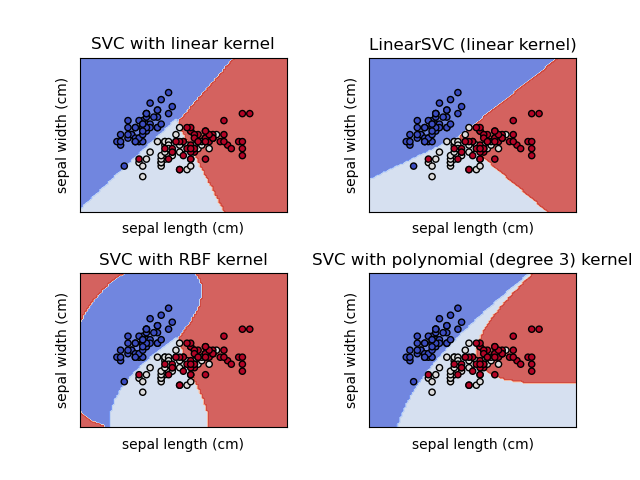
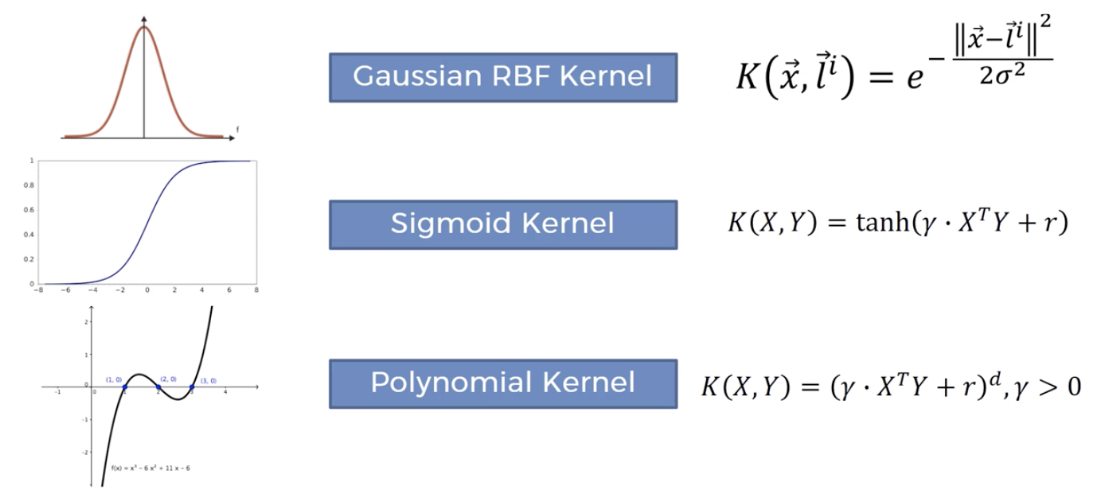

### Comparing the kernels

Ще направим крос валидация на четирите модела и ще ги сравним.

In [20]:
model_lbls = [
              'Polynomial', 'RBF', 'Sigmoid','Linear' 
            ]

models = {
    'Polynomial': {'name': 'SVM Polynomial Kernel',
           'estimator': SVC(kernel='poly'), 
           'param': [{'degree': [8]}],
          },
    'RBF': {'name': 'SVM RBF Kernel',
           'estimator': SVC(kernel= 'rbf'),
           'param': [{}]
          },
    'Sigmoid': {'name': 'SVM Sigmoid Kernel',
           'estimator': SVC(kernel= 'sigmoid'),
           'param': [{}],
          },
    'Linear':{'name': 'SVM Linear Kernel',
           'estimator': SVC(kernel= 'linear'), 
           'param': [{}]
          },
}

scores = ['precision', 'recall','f1']

In [11]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Grid scores on train set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    true_y, pred_y = test_y, model.predict(test_x)
    print(classification_report(true_y, pred_y))
    print()

In [4]:

def evaluate_models(models):
    results_short = {}
    for score in scores:
        print('='*40)
        print("# Tuning hyper-parameters for %s" % score)
        print()

        for m in model_lbls:
            print('-'*40)
            print("Trying model {}".format(models[m]['name']))
            clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                               scoring='%s_macro' % score, 
                               return_train_score = False,
                               n_jobs = 2, 
                               )
            clf.fit(train_x, train_y)
            print_results(clf)
            results_short[m] = clf.best_score_
        print("Summary of results for {}".format(score))
        print("Estimator")
        for m in results_short.keys():
            print("{}\t - score: {:4.2}%".format(models[m]['name'], results_short[m]))

In [21]:
evaluate_models(models)

# Tuning hyper-parameters for precision

----------------------------------------
Trying model SVM Polynomial Kernel
Best parameters set found on train set:

{'degree': 8}

Grid scores on train set:


Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.82      0.65      0.73      1000
           1       0.96      0.87      0.91      1000
           2       0.69      0.59      0.64      1000
           3       0.87      0.70      0.78      1000
           4       0.75      0.67      0.71      1000
           5       0.42      0.95      0.58      1000
           6       0.56      0.50      0.53      1000
           7       0.90      0.66      0.76      1000
           8       0.93      0.85      0.89      1000
           9       0.93      0.89      0.91      1000

    accuracy                           0.73     1000

Best parameters set found on train set:

{'degree': 8}

Grid scores on train set:


Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.82      0.65      0.73      1000
           1       0.96      0.87      0.91      1000
           2       0.69      0.59      0.64      1000
           3       0.87      0.70      0.78      1000
           4       0.75      0.67      0.71      1000
           5       0.42      0.95      0.58      1000
           6       0.56      0.50      0.53      1000
           7       0.90      0.66      0.76      1000
           8       0.93      0.85      0.89      1000
           9       0.93      0.89      0.91      1000

    accuracy                           0.73     10000
   macro avg       0.78      0.73      0.74     10000
weighted avg       0.78      0.73      0.74     10000


-----

На пръв поглед се вижда че Sigmoid ядрото не се справя никак добре с нашите данни. RBF и Linear, от друга страна изглежда, че се справят сравнително прилично. Polynomial ядрото дава по-ниски резултати, но имайки впредвид че сме задали случайна стойност за степента на полинома и това че линейното ядро е дало добър резултат, може да заключим, че при добра настройка на входните параметри, ще може да се подобри модела.

In [36]:
models = {
    'Polynomial': {'name': 'SVM Polynomial Kernel',
           'estimator': SVC(), 
           'param': [{
                   'kernel':["poly"],
                   'degree': [1,2,3,4,5,6,7,8,9,10],
           }]
          },
    'RBF': {'name': 'SVM RBF Kernel',
           'estimator': SVC(),
           'param': [{
                   'kernel':['rbf'],
                   'C': [0.1,1.0,10.0,100.0],
                    'gamma':[1.0,0.1,0.01,0.001],
               
           }]
          },
    'Linear':{'name': 'SVM Linear Kernel',
           'estimator': SVC(), 
           'param': [{
                    'kernel': ['linear'],
                    'C': [0.1,1.0,10.0,100.0],
           }]
          },
}

model_lbls = ['Polynomial','RBF','Linear']
scores = ['f1']

In [37]:
evaluate_models(models)

# Tuning hyper-parameters for f1

----------------------------------------
Trying model SVM Polynomial Kernel
Best parameters set found on train set:

{'degree': 2, 'kernel': 'poly'}

Grid scores on train set:


Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1000
           1       0.99      0.95      0.97      1000
           2       0.75      0.73      0.74      1000
           3       0.86      0.85      0.85      1000
           4       0.77      0.73      0.75      1000
           5       0.86      0.94      0.90      1000
           6       0.60      0.60      0.60      1000
           7       0.90      0.90      0.90      1000
           8       0.95      0.94      0.94      1000
           9       0.95      0.92      0.94      1000

    accuracy                           0.

Предположението за полиномиалното ядро беше правилно. Оценката при 2ра степен на полинома е с ~9% по-висока.

### Tuning the best models

Сега ще се опитаме да изберем по-добри входни параметри за различните ядра.

**C (Регуларизация):** C е наказателният параметър, който представлява грешна класификация или грешка. Той
казва на SVM оптимизацията колко голяма грешка е допустима. Това е начинът, 
по който може да се контролира компромиса между функцията на решението и overfitting.
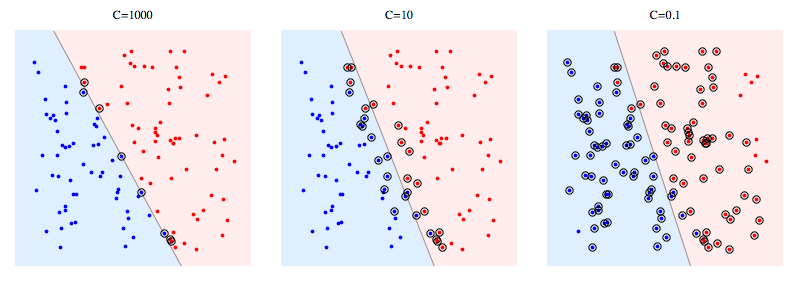
Kогато C е високо, моделът ще класифицира всички входни данни правилно, което води до overfitting.

**gamma:** Той определя до каква степен влияе върху изчисляването на правдоподобната линия на разделяне.
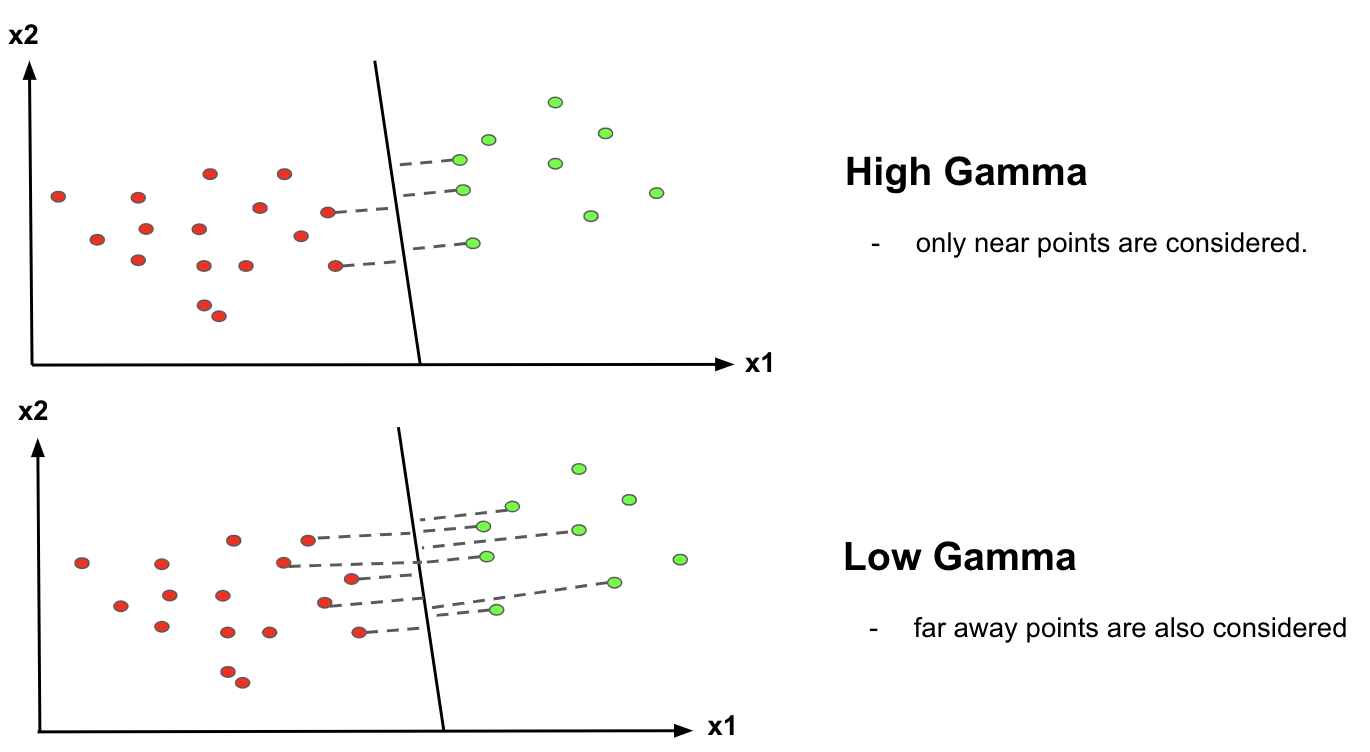
Kогато гамата е по-висока, близките точки ще имат голямо влияние; ниската гама означава, че далечните точки също трябва да се вземат предвид за получаване на границата на решение.
При gamma='scale' (default) се подава 1 / (n_features * X.var()) като стойност gamma.

При gamma=‘auto’, се използва 1 / n_features.

**degree:** Определя се степента на функцията не решението при използването на полиномниалното ядро. 
Linear kernel <=> Polynomial kerner, where degree=1

In [11]:
def plot_scores_by_parameter(model,ks,X_train,X_test,y_train,y_test,visualize=True):
    train_scores = []
    test_scores = []
    
    for k in ks:
        clf = model(k).fit(X_train, y_train)
        train_score = clf.score(X_train, y_train)
        test_score = clf.score(X_test, y_test)
        
        train_scores.append(train_score)
        test_scores.append(test_score)
    if visualize:
        plt.figure(figsize=(10, 6))
        plt.plot(ks, train_scores, color='blue', label='train score')
        plt.plot(ks, test_scores, color='green', label='test score')
        plt.legend()
    return train_scores,test_scores

### Polynomial Kernel

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, random_state=0)

In [37]:
poly_constructor = lambda a: SVC(kernel = "poly",degree = 2,gamma = a)

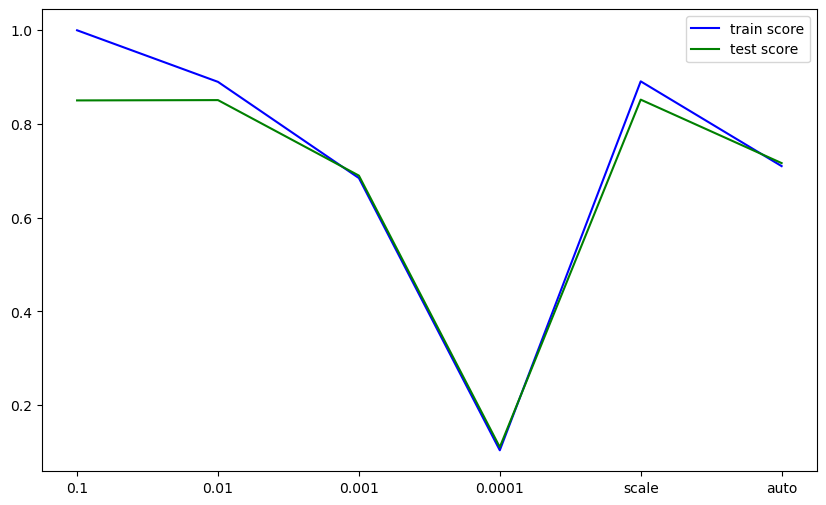

In [12]:
_=plot_scores_by_parameter(poly_constructor,[0.1,0.01,0.001,0.0001,"scale","auto"],X_train,X_valid,y_train,y_valid)

Най-добрите резултати са около 0.01 и при gamma = "scale". Понеже не можем да вземем стойността при scale, ще разгледаме интервал [0.01, 0.1].

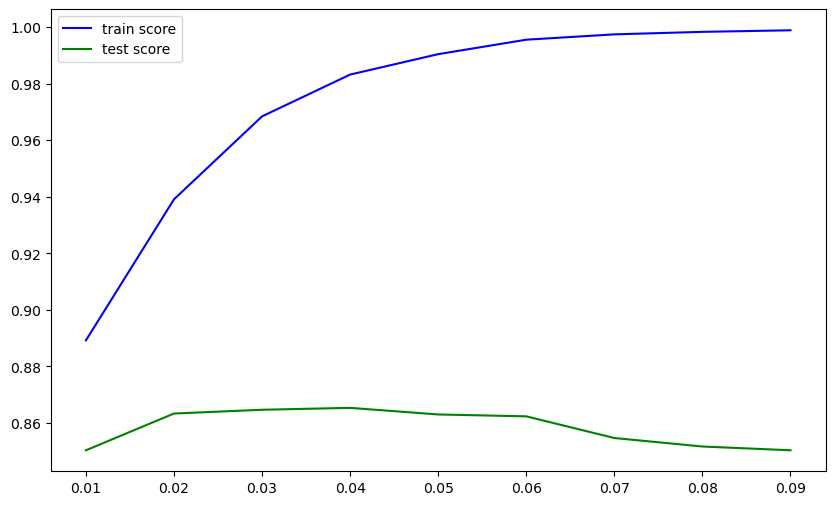

In [38]:
_=plot_scores_by_parameter(poly_constructor,np.arange(0.01,0.1,0.01),X_train,X_valid,y_train,y_valid)

In [47]:
poly_constructor = lambda a: SVC(kernel = "poly",degree = a,gamma = 'scale')

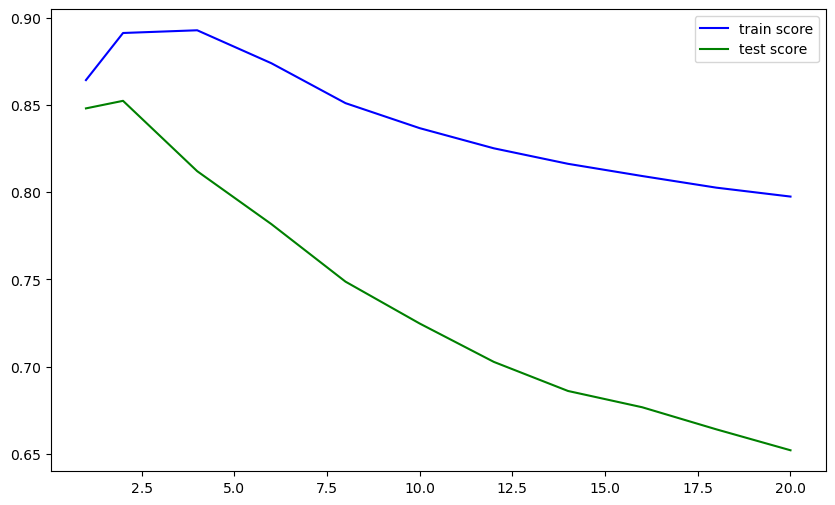

In [50]:
_=plot_scores_by_parameter(poly_constructor,[1,2,4,6,8,10,12,14,16,18,20],X_train,X_valid,y_train,y_valid)

От графиката се вижда, че най-добрата степен на полинома е 2, което означава, че няма нужда да разглеждаме линейното ядро.

In [39]:
poly_constructor = lambda a: SVC(kernel = "poly",degree = 2,gamma = 'scale', C = a)

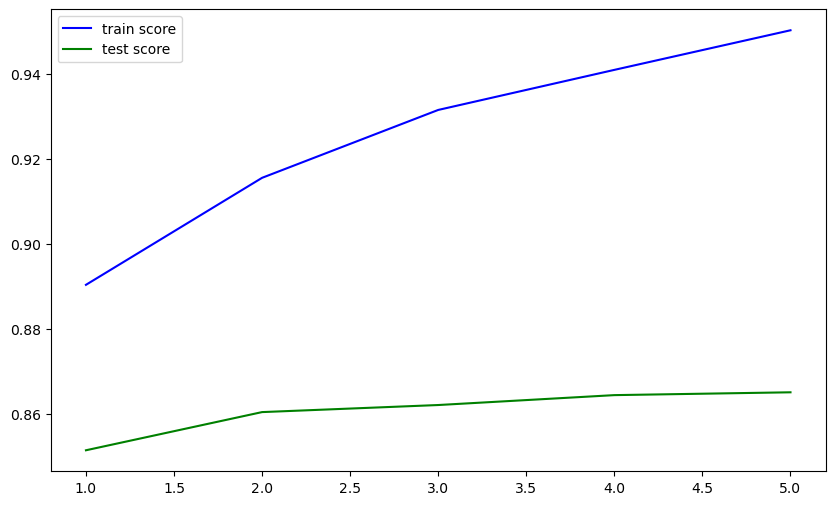

In [40]:
_=plot_scores_by_parameter(poly_constructor,np.arange(1,6,1),X_train,X_valid,y_train,y_valid)

In [14]:
poly_constructor = lambda a: SVC(kernel = "poly",degree = 2,gamma = 'scale',decision_function_shape= a)

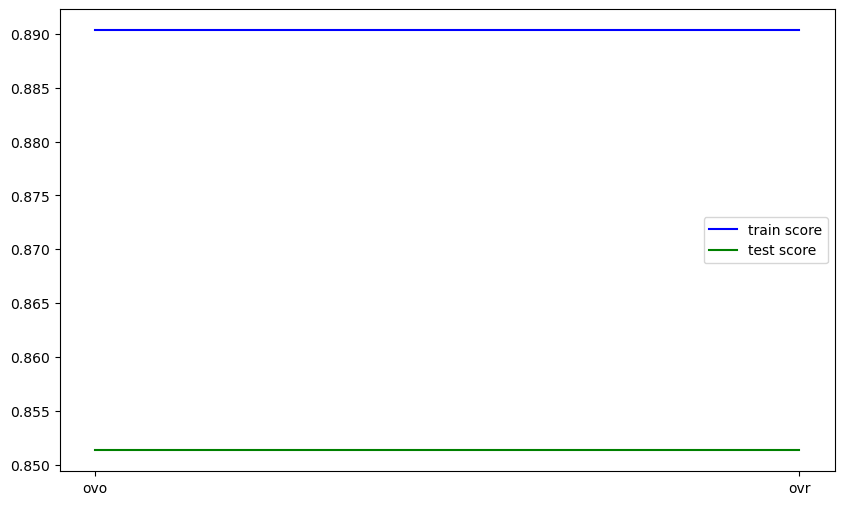

In [15]:
_=plot_scores_by_parameter(poly_constructor,['ovo','ovr'],X_train,X_valid,y_train,y_valid)

Няма значение дали се използва one-vs-rest или one-vs-one метод за сравнение.

In [43]:
poly_constructor = lambda l: SVC(kernel='poly',degree = 2, gamma=l[0], C=l[1])

In [41]:
l1 = np.arange(0.01,0.07,0.01)
l2 = np.arange(1,4,1)
values = list(product(l1, l2))

In [44]:
train_scores,test_scores = plot_scores_by_parameter(poly_constructor,values,X_train,X_valid,y_train,y_valid,visualize=False)

In [45]:
for value,train_score,test_score in zip(values,train_scores,test_scores):
    print(f'gamma={value[0]} C={value[1]}, train score: {train_score}, test_score: {test_score}')

gamma=0.01 C=1, train score: 0.8892222222222222, test_score: 0.8503333333333334
gamma=0.01 C=2, train score: 0.9132222222222223, test_score: 0.859
gamma=0.01 C=3, train score: 0.9304444444444444, test_score: 0.8633333333333333
gamma=0.02 C=1, train score: 0.9391111111111111, test_score: 0.8633333333333333
gamma=0.02 C=2, train score: 0.9641111111111111, test_score: 0.865
gamma=0.02 C=3, train score: 0.9753333333333334, test_score: 0.8663333333333333
gamma=0.03 C=1, train score: 0.9684444444444444, test_score: 0.8646666666666667
gamma=0.03 C=2, train score: 0.9853333333333333, test_score: 0.863
gamma=0.03 C=3, train score: 0.9916666666666667, test_score: 0.8626666666666667
gamma=0.04 C=1, train score: 0.9832222222222222, test_score: 0.8653333333333333
gamma=0.04 C=2, train score: 0.9942222222222222, test_score: 0.8626666666666667
gamma=0.04 C=3, train score: 0.9973333333333333, test_score: 0.8553333333333333
gamma=0.05 C=1, train score: 0.9904444444444445, test_score: 0.863
gamma=0.05 C

От тези резултати може да заключим, че ще бъде най-добре да изберем по-малка стойност за C, защото при по-големи стойности оценката намалява и overfit-ването се увеличава. За gamma няма много голяма разлика, за това нека вземем gamma = 0.3.

### RBF Kernel

In [19]:
rbf_constructor = lambda a: SVC(kernel = "rbf", gamma = a)

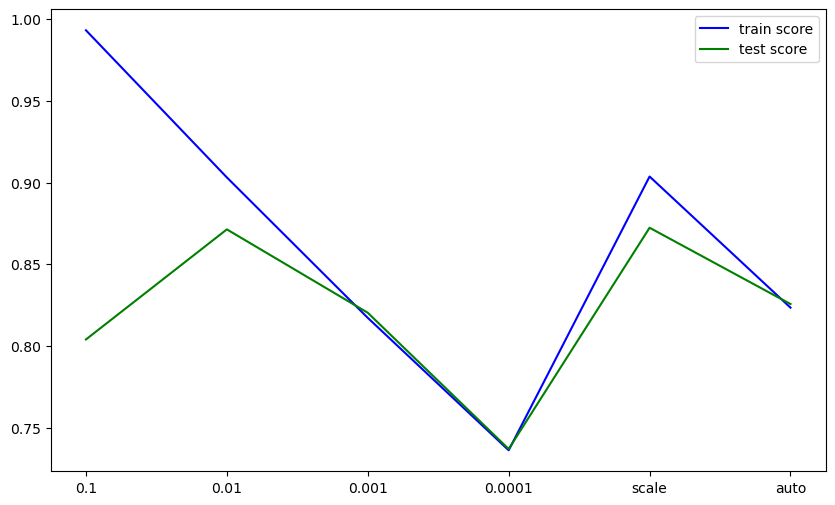

In [20]:
_=plot_scores_by_parameter(rbf_constructor,[0.1,0.01,0.001,0.0001,"scale","auto"],X_train,X_valid,y_train,y_valid)

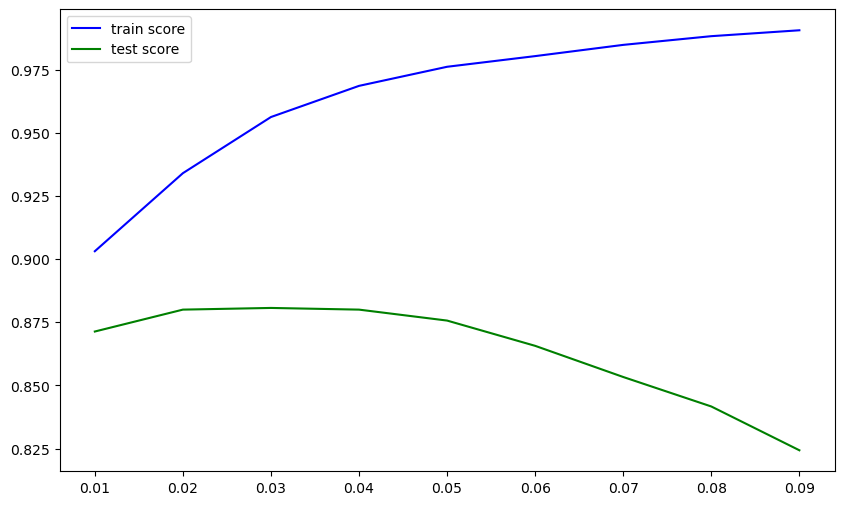

In [21]:
_=plot_scores_by_parameter(rbf_constructor,np.arange(0.01,0.1,0.01),X_train,X_valid,y_train,y_valid)

От тези резултати виждаме че стойностите на gamma при двете ядра ще са близки. Нека вземем интервала [0.01, 0.05].

In [22]:
rbf_constructor = lambda a: SVC(kernel = "rbf", C = a)

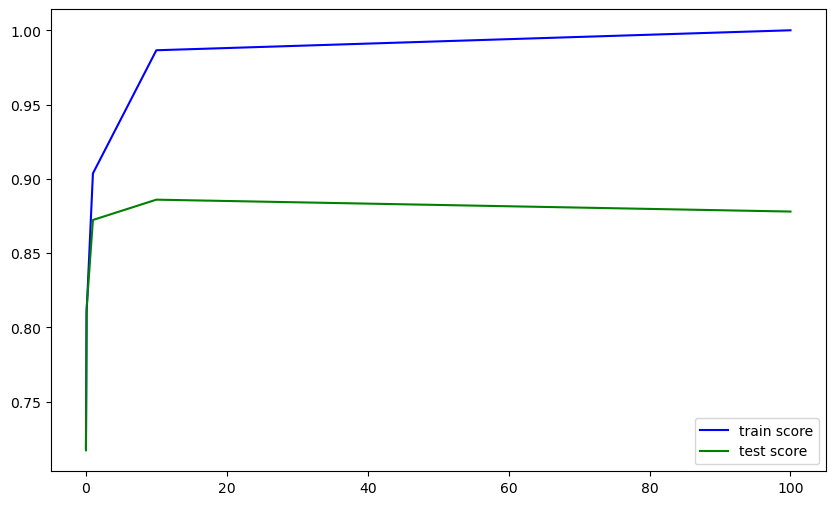

In [23]:
_=plot_scores_by_parameter(rbf_constructor,[0.01,0.1,1,10,100],X_train,X_valid,y_train,y_valid)

Тук се вижда как при високо ниво на допустимата грешка се стига до overfitting и оценката при тестовите данни почва да намлява.
За това нека вземем C в интервала [0, 20].

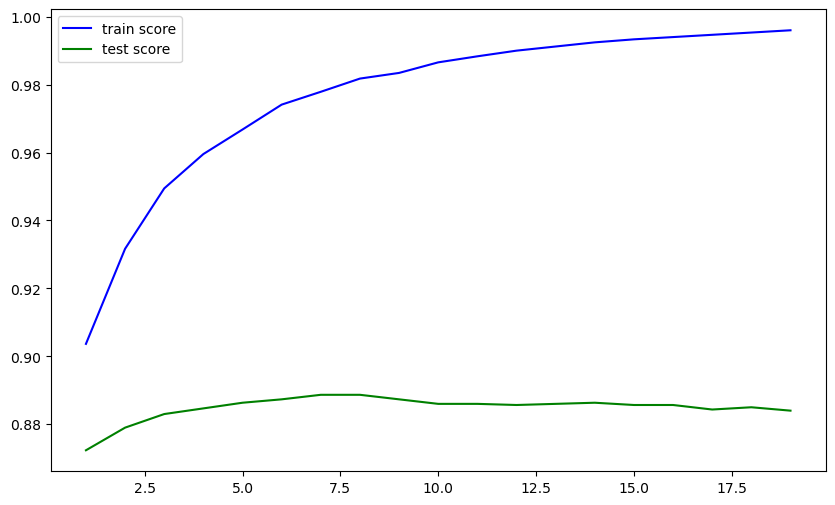

In [24]:
_=plot_scores_by_parameter(rbf_constructor,np.arange(1,20,1),X_train,X_valid,y_train,y_valid)

Нека намалим интервала до [0, 10].

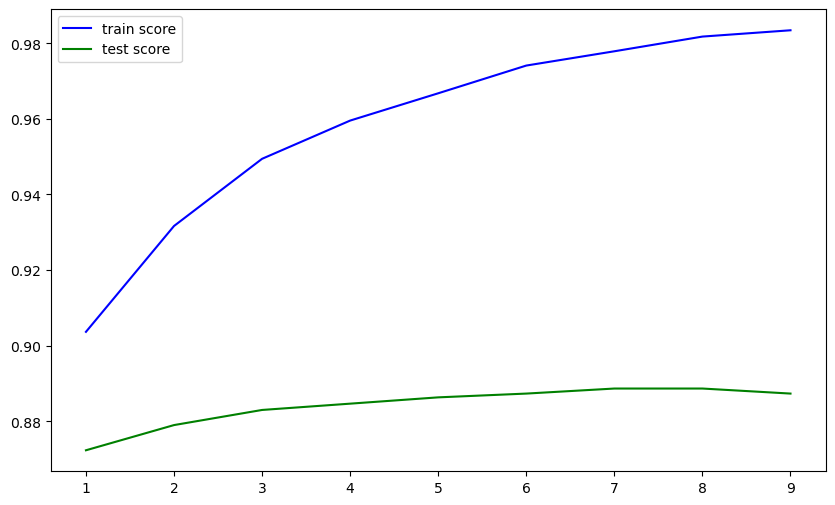

In [25]:
_=plot_scores_by_parameter(rbf_constructor,np.arange(1,10,1),X_train,X_valid,y_train,y_valid)

In [32]:
rbf_constructor = lambda l: SVC(kernel='rbf', gamma=l[0], C=l[1])

In [33]:
from itertools import product

In [34]:
l1 = np.arange(0.01,0.06,0.01)
l2 = np.arange(1,8,1)
values = list(product(l1, l2))

In [35]:
train_scores,test_scores = plot_scores_by_parameter(rbf_constructor,values,X_train,X_valid,y_train,y_valid,visualize=False)

In [36]:
for value,train_score,test_score in zip(values,train_scores,test_scores):
    print(f'gamma={value[0]} C={value[1]}, train score: {train_score}, test_score: {test_score}')

gamma=0.01 C=1, train score: 0.9031111111111111, test_score: 0.8713333333333333
gamma=0.01 C=2, train score: 0.9296666666666666, test_score: 0.879
gamma=0.01 C=3, train score: 0.9477777777777778, test_score: 0.8833333333333333
gamma=0.01 C=4, train score: 0.9582222222222222, test_score: 0.8843333333333333
gamma=0.01 C=5, train score: 0.9656666666666667, test_score: 0.8853333333333333
gamma=0.01 C=6, train score: 0.9732222222222222, test_score: 0.8876666666666667
gamma=0.01 C=7, train score: 0.9763333333333334, test_score: 0.888
gamma=0.02 C=1, train score: 0.934, test_score: 0.88
gamma=0.02 C=2, train score: 0.9668888888888889, test_score: 0.886
gamma=0.02 C=3, train score: 0.9796666666666667, test_score: 0.8913333333333333
gamma=0.02 C=4, train score: 0.9864444444444445, test_score: 0.89
gamma=0.02 C=5, train score: 0.9917777777777778, test_score: 0.889
gamma=0.02 C=6, train score: 0.9948888888888889, test_score: 0.8896666666666667
gamma=0.02 C=7, train score: 0.9955555555555555, test

Вижда се, че за големи C моделът пасва точно на тренировъчните данни - за това нека вземем C = 1, а gamma = 0.02.

### Final Tests

In [47]:
from sklearn.metrics import classification_report,accuracy_score,f1_score

In [50]:
poly = SVC(kernel='poly',degree=2, gamma=0.03, C=1)
rbf= SVC(kernel='rbf', gamma=0.02, C=1)

poly.fit(train_x,train_y)
rbf.fit(train_x,train_y)

poly_pred = poly.predict(test_x)
rbf_pred = rbf.predict(test_x)

print (f'Polynomial Kernel F1 score = {f1_score(test_y, poly_pred,average="micro")*100}')
print (f'RBF Kernel F1 score = {f1_score(test_y, rbf_pred,average="micro")*100}')

print (f'Polynomial Kernel Classification Report \n {classification_report(test_y, poly_pred, labels=range(0,10))}')
print (f'RBF Classification Report \n {classification_report(test_y, rbf_pred, labels=range(0,10))}')

Polynomial Kernel F1 score = 85.6
RBF Kernel F1 score = 86.58000000000001
Polynomial Kernel Classification Report 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.79      0.76      1000
           3       0.88      0.86      0.87      1000
           4       0.77      0.76      0.76      1000
           5       0.93      0.95      0.94      1000
           6       0.66      0.59      0.63      1000
           7       0.92      0.94      0.93      1000
           8       0.95      0.94      0.95      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

RBF Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.85      0.8

RBF и Polynomial ядрата дават много добри оценки, като се вижда увеличение от около 12% при полиномиалното. За RBF, обаче, няма почти никаква промяна дори с най-добрите параметри. Въпреки че, RBF дава по-добри резултати, изчисленията с него бяха изключително бавни и за това бих казал, че Polynomial е най-дорото ядро в случая за SVM.

In [17]:
model_lbls = [
              'NuSVC',
            ]

models = {
    'NuSVC': {'name': 'NuSVC',
           'estimator': NuSVC(), 
           'param': [{}],
          },
}

scores = ['precision', 'recall','f1']

In [18]:
evaluate_models(models)

# Tuning hyper-parameters for precision

----------------------------------------
Trying model NuSVC
Best parameters set found on train set:

{}

Grid scores on train set:


Detailed classification report for the best parameter set:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       1.00      0.87      0.93      1000
           2       0.74      0.69      0.72      1000
           3       0.70      0.83      0.76      1000
           4       0.71      0.73      0.72      1000
           5       0.73      0.86      0.79      1000
           6       0.58      0.43      0.49      1000
           7       0.86      0.85      0.85      1000
           8       0.93      0.85      0.89      1000
           9       0.86      0.91      0.89      1000

    accuracy                           0.78     10000
   macro avg       0.78  